KÜTÜPHANELER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sns


VERİYİ ÇEKME

In [2]:
df = pd.read_csv("veri-seti.csv")
df

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


VERİYİ HAZIRLAMA

In [3]:
X = df.drop(columns=['Diabet'])
y = df['Diabet']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [4]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

MODEL OLUSTURMA

In [5]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

TEST SONUCLARI

Test Verisi Doğruluk Oranı: 0.7575757575757576

Test Verisi Confusion Matrix ve Sınıflandırma Raporu:
[[121  27]
 [ 29  54]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       148
           1       0.67      0.65      0.66        83

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



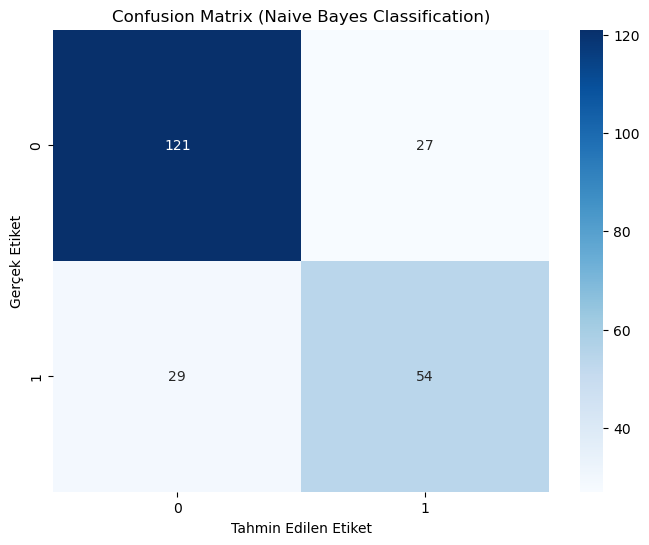

In [7]:
y_pred = naive_bayes.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Verisi Doğruluk Oranı:", test_accuracy)

print("\nTest Verisi Confusion Matrix ve Sınıflandırma Raporu:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Naive Bayes Classification)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()